# Company Data Analysis

In [33]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
def read_data():
    path="D:/DATA SCIENCE/date_wise/Assignments/Nov_19/10. Random Forests/Company_Data.csv"
    data=pd.read_csv(path)
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(2))

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  


In [4]:
# Data copying
df=data.copy()
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### EDA (Exploratory Data Analysis)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [10]:
df.shape

(400, 11)

In [12]:
df.ShelveLoc.value_counts()

ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64

In [14]:
df.Urban.value_counts()

Urban
Yes    282
No     118
Name: count, dtype: int64

In [15]:
df.US.value_counts()

US
Yes    258
No     142
Name: count, dtype: int64

<Axes: >

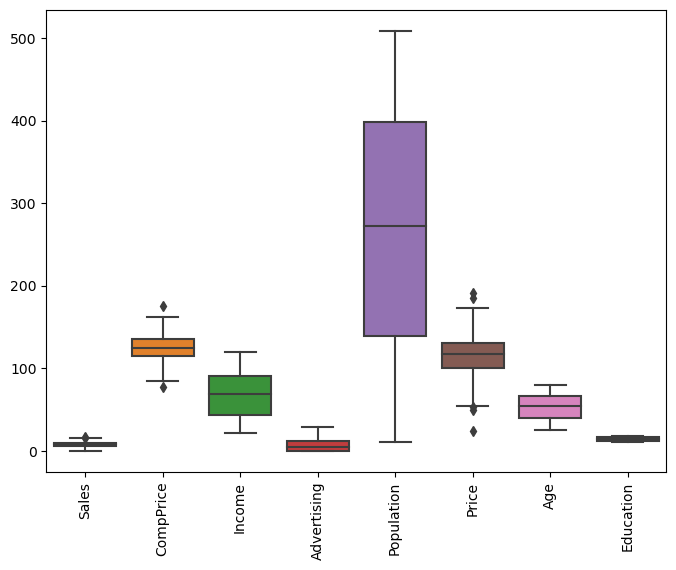

In [22]:
#Checking for outliers
plt.figure(figsize=(8,6))
plt.xticks(rotation=90,fontsize="medium")
sns.boxplot(df[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'Age', 'Education',]])



Text(0.5, 1.0, 'Advertising V/S Sales')

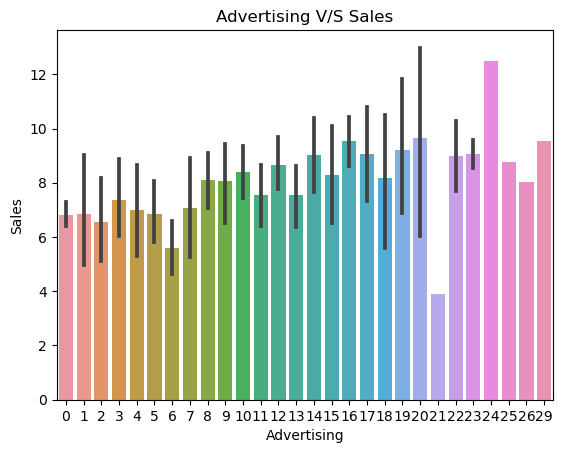

In [25]:
sns.barplot(x="Advertising",y="Sales",data=df)
plt.title("Advertising V/S Sales")

Text(0.5, 1.0, 'Age V/S Income')

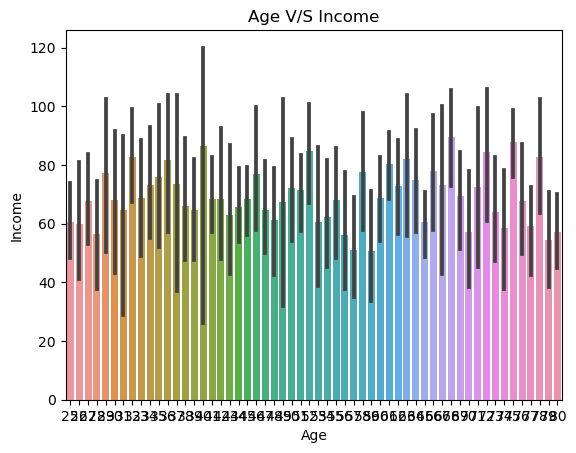

In [24]:
sns.barplot(x="Age",y="Income",data=df)
plt.title("Age V/S Income")

Text(0.5, 1.0, 'Advertising V/S Price')

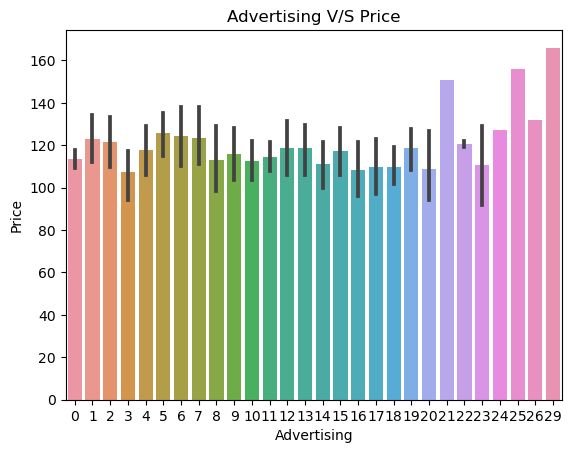

In [26]:
sns.barplot(x="Advertising",y="Price",data=df)
plt.title("Advertising V/S Price")

Text(0.5, 1.0, 'Age V/S Education')

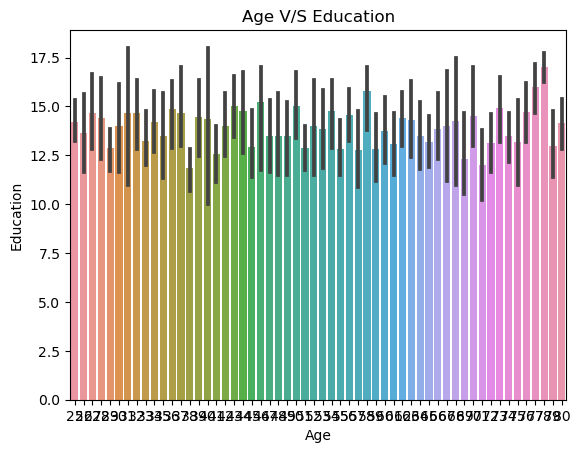

In [28]:
sns.barplot(x="Age",y="Education",data=df)
plt.title("Age V/S Education")

Text(0.5, 1.0, 'Education V/S Population')

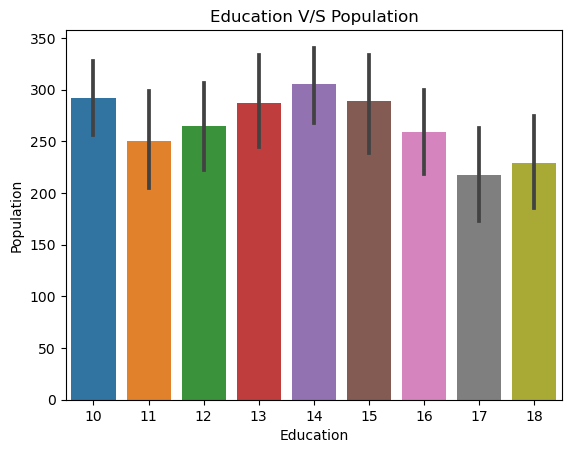

In [29]:
sns.barplot(x="Education",y="Population", data=df)
plt.title('Education V/S Population')

Text(0.5, 1.0, 'Count of Sales')

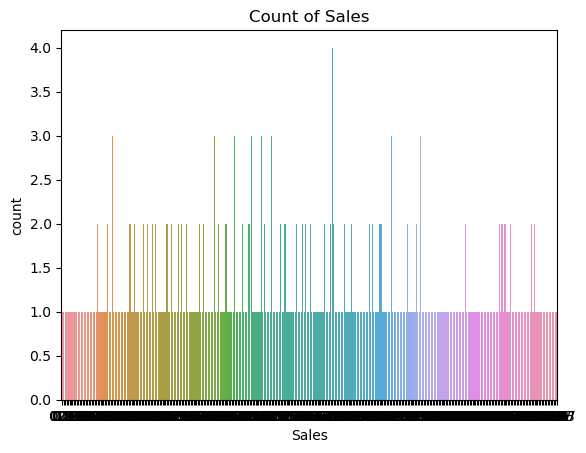

In [30]:
sns.countplot(x="Sales",data=df)
plt.title("Count of Sales")

Text(0.5, 1.0, 'Sales V/S Price')

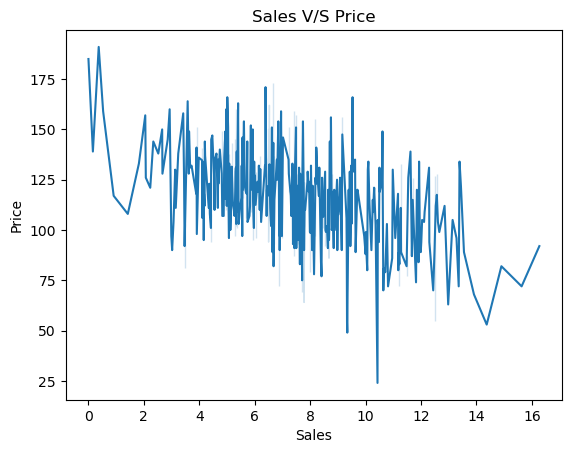

In [31]:
sns.lineplot(x="Sales",y="Price",data=df)
plt.title("Sales V/S Price")

<Axes: >

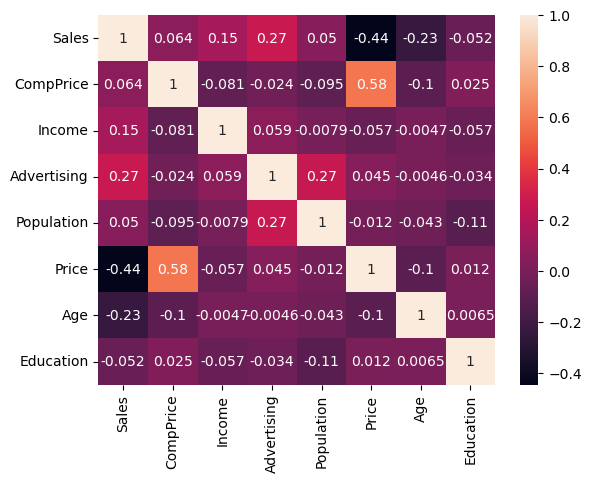

In [32]:
sns.heatmap(data [['Sales', 'CompPrice', 'Income', 'Advertising', 'Population','Price', 'Age', 'Education',]].corr(),annot=True)

### Pre-processing and Label encoding

In [35]:
# As our columns 'ShelveLoc', 'Urban' and 'US' are string type, we need to encode it to numerical value in order to carry out the analysis
label_encoder=LabelEncoder()
df['ShelveLoc']=label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']=label_encoder.fit_transform(df['Urban'])
df['US']=label_encoder.fit_transform(df['US'])

In [36]:
# Now, we can check it is properly encoded into numerical value
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


### Random Forest Classifier

In [64]:
## As Sales data is continous and not in binary form, we need to create a new column 'Sales_data' by converting the original sales column to binary
df['Sales_data'] = df.Sales.map(lambda x: 1 if x>8 else 0)
print(df['Sales_data'])

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales_data, Length: 400, dtype: int64


In [60]:
def data_prep(df):
    X=df[['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']]
    y=df['Sales_data']
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=123)
    return X_train, X_test,y_train,y_test

In [61]:
 X_train,X_test,y_train,y_test=data_prep(df)

In [62]:
X_train.shape

(320, 10)

In [63]:
X_test.shape

(80, 10)

In [75]:
def rndm_tree(X_train,X_test,y_train):
    model_rf=RandomForestClassifier(criterion='entropy', max_depth=10)
    train_model=model_rf.fit(X_train,y_train)
    pred=train_model.predict(X_test)
    return pred

In [76]:
pred=rndm_tree(X_train,X_test,y_train)
pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [77]:
#Defining model diagnostics
def rndm_tree_diag(y_test,pred):
    acc=accuracy_score(y_test, pred)
    clf=classification_report(y_test,pred)
    conf=confusion_matrix(y_test,pred)
    return acc,clf,conf

In [71]:
acc,clf,conf=rndm_tree_diag(y_test,pred)
print("The accuracy score:",acc)
print("------------------------------")
print("The Classification Report:", clf)
print("------------------------------")
print("The Confusion Matrix:",conf)

The accuracy score: 0.7625
------------------------------
The Classification Report:               precision    recall  f1-score   support

           0       0.71      0.90      0.80        41
           1       0.86      0.62      0.72        39

    accuracy                           0.76        80
   macro avg       0.78      0.76      0.76        80
weighted avg       0.78      0.76      0.76        80

------------------------------
The Confusion Matrix: [[37  4]
 [15 24]]


#### Here, our model is giving only 76.25% accuracy which is coparatively low, and the reason which we can see is there are multiple independent variables which we have used. We can use the feature engineering here  and iprove the acuracy of model by adding or removing features based on their importance.